# MICROSOFT

In [1]:
#1. Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train Data

In [2]:
# Reading the CSV files into DataFrames
train_data = pd.read_csv('Microsoft_train_data.csv')
train_data.head()

,AlertTitle,Hour,Day,AccountName,Category,EntityType,CountryCode,DeviceName,City,State,IncidentGrade
0,6,6,4,453297,InitialAccess,Ip,31,153085,3,6,TruePositive
1,43,3,14,24887,Exfiltration,User,242,153085,10630,1445,FalsePositive
2,298,4,13,453297,InitialAccess,Url,242,153085,10630,1445,FalsePositive
3,2,16,10,453297,CommandAndControl,Url,242,153085,10630,1445,BenignPositive
4,74,1,15,479,Execution,User,242,153085,10630,1445,TruePositive


In [3]:
train_data.isna().sum()

AlertTitle       0
Hour             0
Day              0
AccountName      0
Category         0
EntityType       0
CountryCode      0
DeviceName       0
City             0
State            0
IncidentGrade    0
dtype: int64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8970539 entries, 0 to 8970538
Data columns (total 11 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Hour           int64 
 2   Day            int64 
 3   AccountName    int64 
 4   Category       object
 5   EntityType     object
 6   CountryCode    int64 
 7   DeviceName     int64 
 8   City           int64 
 9   State          int64 
 10  IncidentGrade  object
dtypes: int64(8), object(3)
memory usage: 752.8+ MB


In [5]:
# Target variable distribution
print("Target variable distribution:")
train_data['IncidentGrade'].value_counts()

Target variable distribution:


IncidentGrade
BenignPositive    3875534
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64

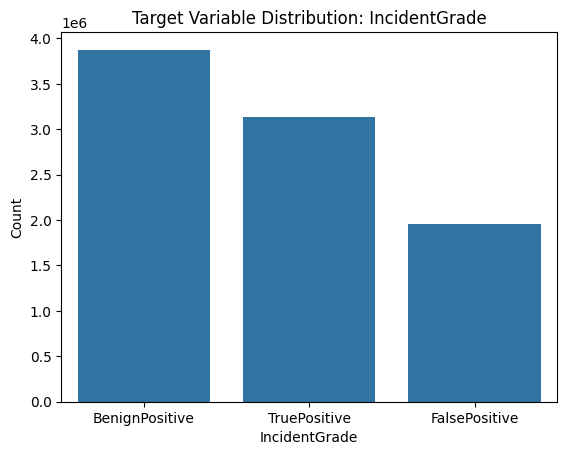

In [6]:
sns.countplot(data=train_data, x='IncidentGrade', order=train_data['IncidentGrade'].value_counts().index)
plt.title('Target Variable Distribution: IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

# 4. Exploratory Data Analysis (EDA) - Visualizing Distributions

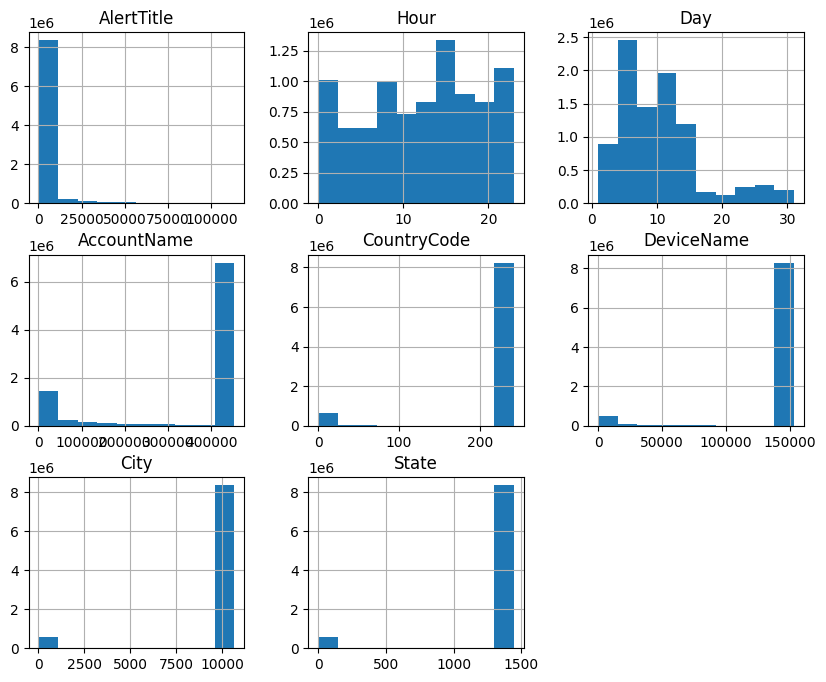

In [7]:
train_data.hist(figsize=(10,8))
plt.show()

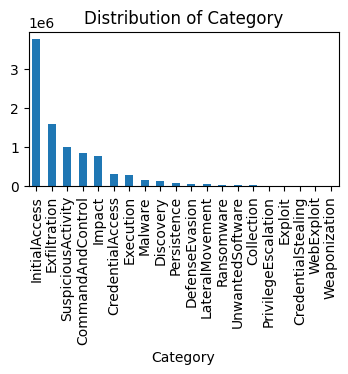

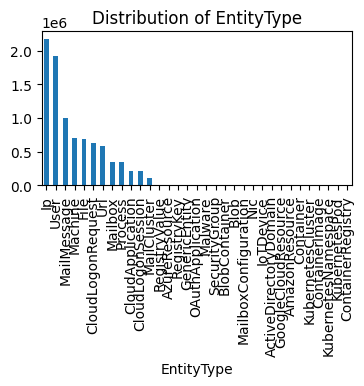

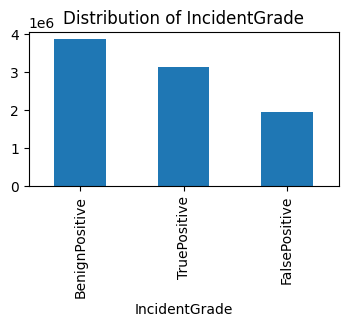

In [8]:
# Bar plot for categorical data
# List of categorical columns in DataFrame
categorical_columns = train_data.select_dtypes(include=['object','category'])

for col in categorical_columns:
    plt.figure(figsize=(4, 2))
    train_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

In [9]:
train_data.nunique()

AlertTitle        86149
Hour                 24
Day                  31
AccountName      368250
Category             20
EntityType           33
CountryCode         236
DeviceName       114541
City               9342
State              1368
IncidentGrade         3
dtype: int64

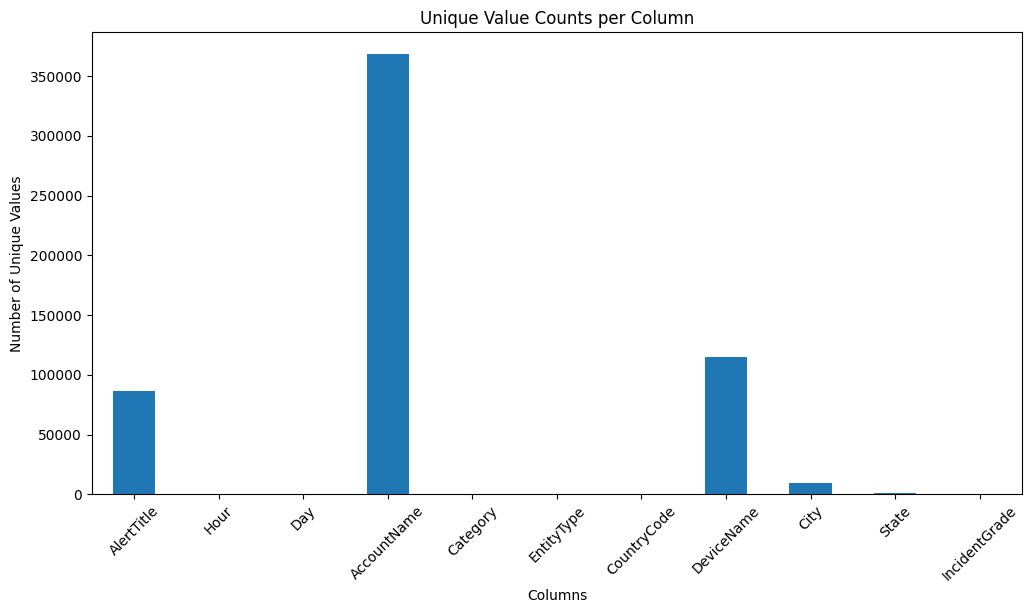

In [10]:
unique_counts = train_data.nunique()
unique_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Unique Value Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.show()

In [11]:
train_data['AlertTitle'].value_counts()

AlertTitle
0         1320736
2          597423
1          480010
4          412029
3          412025
           ...   
112232          1
110362          1
110346          1
111797          1
110883          1
Name: count, Length: 86149, dtype: int64

In [12]:
train_data['DeviceName'].value_counts().head(20)

DeviceName
153085    8274527
0            4376
1            3944
5            2153
4            2152
6            1879
13           1727
7            1631
10           1545
9            1519
8            1512
11           1284
12           1251
16           1187
15           1095
14           1094
22           1021
28            932
20            920
17            813
Name: count, dtype: int64

In [13]:
train_data['City'].value_counts()

City
10630    8342804
0         103145
1          22075
2          19195
3          15787
          ...   
5464           1
7403           1
6960           1
6598           1
10554          1
Name: count, Length: 9342, dtype: int64

In [14]:
print(train_data.columns)
train_data.shape

Index(['AlertTitle', 'Hour', 'Day', 'AccountName', 'Category', 'EntityType',
       'CountryCode', 'DeviceName', 'City', 'State', 'IncidentGrade'],
      dtype='object')


(8970539, 11)

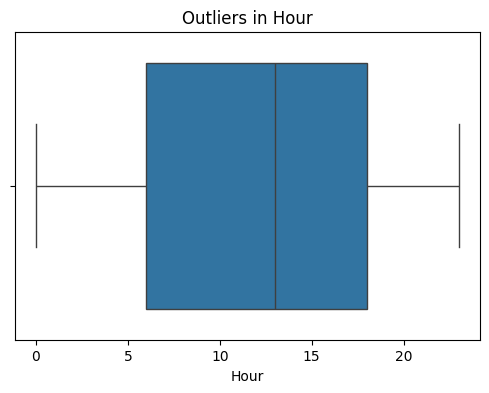

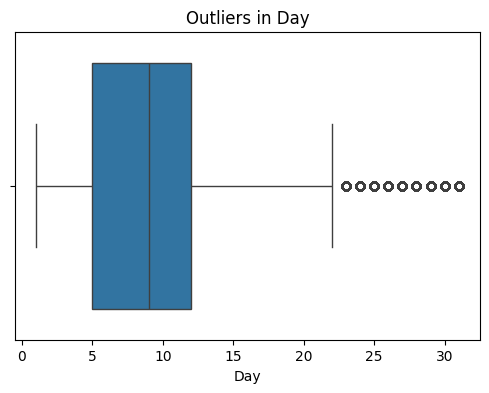

In [15]:
# Boxplot for 'Hour'
plt.figure(figsize=(6, 4))
sns.boxplot(x=train_data['Hour'])
plt.title('Outliers in Hour')
plt.show()

# Boxplot for 'Day'
plt.figure(figsize=(6, 4))
sns.boxplot(x=train_data['Day'])
plt.title('Outliers in Day')
plt.show()

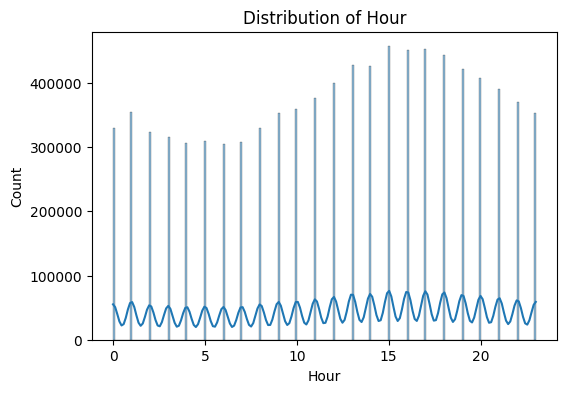

In [16]:
# Distribution of 'Hour'
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Hour'], kde=True)
plt.title('Distribution of Hour')
plt.show()


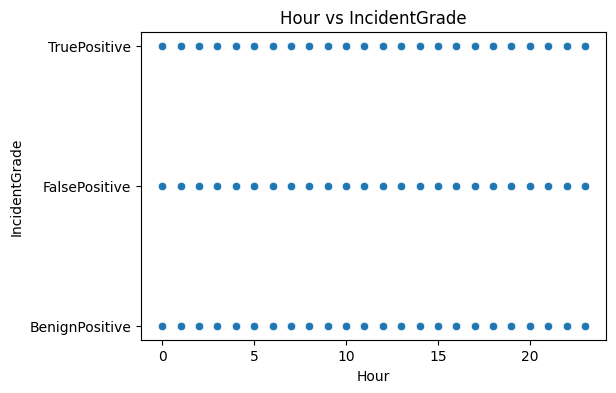

In [17]:
# If IncidentGrade is numeric
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_data, x='Hour', y='IncidentGrade')
plt.title('Hour vs IncidentGrade')
plt.show()


# Splitting and Encoding Categorical Variables

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Use the cleaned dataset BEFORE encoding
# Assuming your cleaned dataset is named `train_data`
X = train_data.drop('IncidentGrade', axis=1)
y = train_data['IncidentGrade']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Data split complete.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Step 3: Reset index to avoid misalignment during encoding
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Step 4: Encode categorical columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))  # Use same encoder
    label_encoders[col] = le

# Step 5: Encode target
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

print("Encoding complete.")


✅ Data split complete.
Train shape: (7176431, 10)
Test shape: (1794108, 10)
✅ Encoding complete.


# Logistic Regression with 0.51 accuracy

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit on training data
logreg.fit(X_train, y_train)

# Predict on both training and testing (validation) sets
logreg_pred_train = logreg.predict(X_train)
logreg_pred_test = logreg.predict(X_test)

# Print classification reports
print("Train Data")
print(classification_report(y_train, logreg_pred_train))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, logreg_pred_test))


Train Data
              precision    recall  f1-score   support

           0       0.49      0.86      0.62   3100427
           1       0.00      0.00      0.00   1563903
           2       0.59      0.40      0.48   2512101

    accuracy                           0.51   7176431
   macro avg       0.36      0.42      0.37   7176431
weighted avg       0.42      0.51      0.44   7176431

--------------------------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.49      0.86      0.62    775107
           1       0.00      0.00      0.00    390976
           2       0.59      0.40      0.48    628025

    accuracy                           0.51   1794108
   macro avg       0.36      0.42      0.37   1794108
weighted avg       0.42      0.51      0.44   1794108



# Decision Tee with accuracy 0.88

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predictions
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)

# Evaluation
print("Train Data")
print(classification_report(y_train, dt_pred_train))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, dt_pred_test))


Train Data
              precision    recall  f1-score   support

           0       0.90      0.97      0.93   3100427
           1       0.94      0.86      0.90   1563903
           2       0.94      0.90      0.92   2512101

    accuracy                           0.92   7176431
   macro avg       0.93      0.91      0.92   7176431
weighted avg       0.92      0.92      0.92   7176431

--------------------------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.87      0.94      0.90    775107
           1       0.88      0.81      0.84    390976
           2       0.90      0.87      0.88    628025

    accuracy                           0.88   1794108
   macro avg       0.88      0.87      0.88   1794108
weighted avg       0.88      0.88      0.88   1794108



# Random Forest with accuracy 0.77

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    class_weight='balanced',
    n_jobs=1,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

print("Train Data")
print(classification_report(y_train, rf_pred_train))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, rf_pred_test))


Train Data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79   3100427
           1       0.69      0.66      0.67   1563903
           2       0.85      0.74      0.79   2512101

    accuracy                           0.77   7176431
   macro avg       0.76      0.75      0.75   7176431
weighted avg       0.77      0.77      0.77   7176431

--------------------------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79    775107
           1       0.69      0.65      0.67    390976
           2       0.85      0.74      0.79    628025

    accuracy                           0.77   1794108
   macro avg       0.76      0.75      0.75   1794108
weighted avg       0.77      0.77      0.76   1794108



# XGBoost with accuracy 0.74

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize the model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

# Evaluation
print("Train Data")
print(classification_report(y_train, xgb_pred_train))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, xgb_pred_test))


Train Data
              precision    recall  f1-score   support

           0       0.67      0.94      0.78   3100427
           1       0.82      0.40      0.54   1563903
           2       0.85      0.70      0.77   2512101

    accuracy                           0.74   7176431
   macro avg       0.78      0.68      0.70   7176431
weighted avg       0.77      0.74      0.72   7176431

--------------------------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.67      0.94      0.78    775107
           1       0.82      0.40      0.54    390976
           2       0.85      0.70      0.77    628025

    accuracy                           0.74   1794108
   macro avg       0.78      0.68      0.70   1794108
weighted avg       0.77      0.74      0.72   1794108



# LGBM with accuracy 0.74

In [23]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Initialize the model
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42
)

# Fit the model
lgbm_model.fit(X_train, y_train)

# Predictions
lgbm_pred_train = lgbm_model.predict(X_train)
lgbm_pred_test = lgbm_model.predict(X_test)

# Evaluation
print("Train Data")
print(classification_report(y_train, lgbm_pred_train))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, lgbm_pred_test))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.398420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1472
[LightGBM] [Info] Number of data points in the train set: 7176431, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Train Data
              precision    recall  f1-score   support

           0       0.73      0.81      0.77   3100427
           1       0.61      0.62      0.62   1563903
           2       0.84      0.72      0.77   2512101

    accuracy                           0.74   7176431
   macro avg       0.73      0.72      0.72   7176431
weighted avg       0.74      0.74      0.74   7176431

--------------------------------------------------
Test Data
              precision    rec

# Under Sampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Create the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply to training data only (NOT test)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Undersampling complete.")


print("New class distribution:\n", pd.Series(y_train_under).value_counts())



Undersampling complete.
New class distribution:
 0    1563903
1    1563903
2    1563903
Name: count, dtype: int64


# Logistc Regression with accuracy 0.36

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
logreg_under = LogisticRegression(max_iter=1000, random_state=42)

# Train on undersampled data
logreg_under.fit(X_train_under, y_train_under)

# Predict on both train (under) and test (original)
logreg_pred_train_under = logreg_under.predict(X_train_under)
logreg_pred_test_under = logreg_under.predict(X_test)

# Evaluate
print("Train Data (Undersampled)")
print(classification_report(y_train_under, logreg_pred_train_under))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, logreg_pred_test_under))


Train Data (Undersampled)
              precision    recall  f1-score   support

           0       0.45      0.20      0.28   1563903
           1       0.33      0.56      0.42   1563903
           2       0.49      0.43      0.46   1563903

    accuracy                           0.40   4691709
   macro avg       0.43      0.40      0.39   4691709
weighted avg       0.43      0.40      0.39   4691709

--------------------------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.60      0.20      0.30    775107
           1       0.22      0.56      0.31    390976
           2       0.52      0.43      0.47    628025

    accuracy                           0.36   1794108
   macro avg       0.44      0.40      0.36   1794108
weighted avg       0.49      0.36      0.36   1794108



# Decision Tree with Accuracy 0.87

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the model
dt_under = DecisionTreeClassifier(random_state=42)

# Train on undersampled data
dt_under.fit(X_train_under, y_train_under)

# Predict
dt_pred_train_under = dt_under.predict(X_train_under)
dt_pred_test_under = dt_under.predict(X_test)

# Evaluate
print("Train Data (Undersampled)")
print(classification_report(y_train_under, dt_pred_train_under))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, dt_pred_test_under))


Train Data (Undersampled)
              precision    recall  f1-score   support

           0       0.88      0.95      0.92   1563903
           1       0.94      0.89      0.91   1563903
           2       0.92      0.90      0.91   1563903

    accuracy                           0.91   4691709
   macro avg       0.91      0.91      0.91   4691709
weighted avg       0.91      0.91      0.91   4691709

--------------------------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.88      0.89      0.89    775107
           1       0.81      0.84      0.82    390976
           2       0.89      0.85      0.87    628025

    accuracy                           0.87   1794108
   macro avg       0.86      0.86      0.86   1794108
weighted avg       0.87      0.87      0.87   1794108



# Random Forest with accuracy 0.77

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model (lighter config to avoid memory issues)
rf_under = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    class_weight='balanced',
    n_jobs=1,
    random_state=42
)

# Train on undersampled data
rf_under.fit(X_train_under, y_train_under)

# Predict
rf_pred_train_under = rf_under.predict(X_train_under)
rf_pred_test_under = rf_under.predict(X_test)

# Evaluate
print("Train Data (Undersampled)")
print(classification_report(y_train_under, rf_pred_train_under))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, rf_pred_test_under))


Train Data (Undersampled)
              precision    recall  f1-score   support

           0       0.66      0.85      0.74   1563903
           1       0.80      0.66      0.73   1563903
           2       0.83      0.74      0.78   1563903

    accuracy                           0.75   4691709
   macro avg       0.76      0.75      0.75   4691709
weighted avg       0.76      0.75      0.75   4691709

--------------------------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79    775107
           1       0.68      0.66      0.67    390976
           2       0.85      0.74      0.79    628025

    accuracy                           0.77   1794108
   macro avg       0.76      0.75      0.75   1794108
weighted avg       0.77      0.77      0.77   1794108



# XGBoost with Accuracy 0.73

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize the model
xgb_under = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Train on undersampled data
xgb_under.fit(X_train_under, y_train_under)

# Predict
xgb_pred_train_under = xgb_under.predict(X_train_under)
xgb_pred_test_under = xgb_under.predict(X_test)

# Evaluate
print("Train Data (Undersampled)")
print(classification_report(y_train_under, xgb_pred_train_under))
print("-" * 50)
print("Test Data")
print(classification_report(y_test, xgb_pred_test_under))


Train Data (Undersampled)
              precision    recall  f1-score   support

           0       0.61      0.82      0.70   1563903
           1       0.74      0.60      0.66   1563903
           2       0.81      0.70      0.75   1563903

    accuracy                           0.70   4691709
   macro avg       0.72      0.70      0.70   4691709
weighted avg       0.72      0.70      0.70   4691709

--------------------------------------------------
Test Data
              precision    recall  f1-score   support

           0       0.71      0.82      0.76    775107
           1       0.61      0.60      0.61    390976
           2       0.84      0.70      0.76    628025

    accuracy                           0.73   1794108
   macro avg       0.72      0.70      0.71   1794108
weighted avg       0.73      0.73      0.73   1794108



# LGBM with accuracy 0.74

In [29]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Initialize the model
lgbm_under = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42
)

# Train on undersampled data
lgbm_under.fit(X_train_under, y_train_under)

# Predict only on test set (to avoid memory issues)
lgbm_pred_test_under = lgbm_under.predict(X_test)

# Test Evaluation
print("✅ Test Data (Undersampled)")
print(classification_report(y_test, lgbm_pred_test_under))

# Optional: Evaluate on a sample of training data
print("-" * 50)
print("📊 Train Data Sample (50K rows) from Undersampled Set")

# Sample 50,000 rows safely (works for both NumPy or DataFrame)
sample_idx = np.random.choice(len(X_train_under), size=50000, replace=False)

# Handle both DataFrame and array inputs
if isinstance(X_train_under, pd.DataFrame):
    X_train_sample = X_train_under.iloc[sample_idx]
else:
    X_train_sample = X_train_under[sample_idx]

if isinstance(y_train_under, pd.Series):
    y_train_sample = y_train_under.iloc[sample_idx]
else:
    y_train_sample = y_train_under[sample_idx]

# Predict and evaluate
lgbm_pred_train_sample = lgbm_under.predict(X_train_sample)
print(classification_report(y_train_sample, lgbm_pred_train_sample))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.261077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1473
[LightGBM] [Info] Number of data points in the train set: 4691709, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
✅ Test Data (Undersampled)
              precision    recall  f1-score   support

           0       0.73      0.82      0.77    775107
           1       0.62      0.62      0.62    390976
           2       0.84      0.71      0.77    628025

    accuracy                           0.74   1794108
   macro avg       0.73      0.72      0.72   1794108
weighted avg       0.74      0.74      0.74   1794108

--------------------------------------------------
📊 Train Data Sample (50K

# Saving the best model (Decision Tree) with accuracy 0.88

In [22]:
import joblib

# Save the trained model
joblib.dump(dt_model, 'best_decision_tree_model.pkl')

['best_decision_tree_model.pkl']

In [20]:
# Save the label encoder used for IncidentGrade
joblib.dump(target_encoder, 'incident_grade_encoder.pkl')

# Save label encoders for features
joblib.dump(label_encoders, 'feature_label_encoders.pkl')


print("✅ Model and encoder saved.")


✅ Model and encoder saved.
